In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
#from scipy import stats
#from sklearn.cluster import DBSCAN
#from sklearn.cluster import KMeans

In [46]:
device_id = 'A5383E9A-F777-4D73-9705-79686E95ECA0'
#start_date =
#end_date = 
#hours = 

In [47]:
data = pd.read_csv('sample_data.csv')

In [48]:

data=data.rename(columns={'timestamp_with_second_precision':'timestamp','timestamp_millisecond_component':'milliseconds',
             'iso_3166_1_alpha_2_country_code':'country_code', 
             'lat/long accuracy in meters':'meters_accuracy'})
data

,timestamp,milliseconds,advertising_user_id,advertising_user_id_type,device_latitude,device_longitude,device_latitude_longitude_accuracy_in_meters,country_code,supplier_id,reporting_application_id,device_ip_address,base64_encoded_device_user_agent
0,2020-10-01T13:03:41Z,667,281A871F-4915-4E9F-8878-0CB9C78F860D,IDFA,42.421910,-83.465775,15.30,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,150.198.122.92,NaN
1,2020-10-01T13:04:10Z,909,281A871F-4915-4E9F-8878-0CB9C78F860D,IDFA,42.424120,-83.464780,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,150.198.122.92,NaN
2,2020-10-01T13:04:14Z,924,281A871F-4915-4E9F-8878-0CB9C78F860D,IDFA,42.423855,-83.464260,20.83,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,150.198.122.92,NaN
3,2020-10-01T13:04:20Z,241,281A871F-4915-4E9F-8878-0CB9C78F860D,IDFA,42.423817,-83.463380,22.23,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,150.198.122.92,NaN
4,2020-10-01T13:04:23Z,241,281A871F-4915-4E9F-8878-0CB9C78F860D,IDFA,42.423798,-83.462550,14.51,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,150.198.122.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
390249,2020-10-26T23:36:21Z,0,CA64846C-25BD-48D8-86C4-3CA3B73E9782,IDFA,32.081150,-96.812170,62.10,US,671552C9107F65B5,NaN,NaN,NaN
390250,2020-10-27T14:49:39Z,0,E50EC011-2493-4309-9C91-1BC78D1B2447,IDFA,33.929920,-118.117270,65.00,US,671552C9107F65B5,NaN,NaN,NaN
390251,2020-10-27T11:34:29Z,0,E50EC011-2493-4309-9C91-1BC78D1B2447,IDFA,34.120650,-118.004180,64.00,US,671552C9107F65B5,NaN,NaN,NaN
390252,2020-10-27T11:15:42Z,0,746E978B-94DA-4BBD-A6CA-978F9A9A0A24,IDFA,32.824580,-97.157420,12.50,US,671552C9107F65B5,NaN,NaN,NaN


In [51]:
data = data.loc[data['advertising_user_id'] == f'{device_id}' ]

In [52]:
y = data.loc[:, 'device_longitude'].values
x = data.loc[:, 'device_latitude'].values
data_coords = np.array(list((zip(y,x))))

In [42]:
## k-means clustering

k = 6 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data_coords)
# group labels
groupidx = kmeans.predict(data_coords)
# centroids
cents = kmeans.cluster_centers_

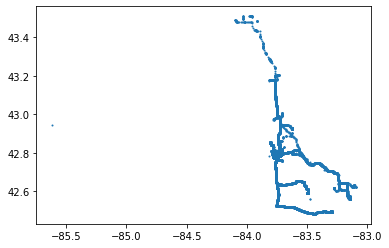

In [43]:
plt.plot(data['device_longitude'], data['device_latitude'], 'o', markersize=1)
plt.show()

In [44]:
# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data_coords)):
    plt.plot([ data_coords[i,0],cents[groupidx[i],0] ],[ data_coords[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B58E5969D8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
## dbscan

clustmodel = DBSCAN(eps=.04,min_samples=1000).fit(data_coords)
groupidx = clustmodel.labels_

# number of clusters
nclust = max(groupidx)+1 # +1 for indexing

# compute cluster centers
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data_coords[groupidx==ci,0])
    cents[ci,1] = np.mean(data_coords[groupidx==ci,1])
print(cents)

# draw lines from each data point to the centroids of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data_coords)):
    if groupidx[i]==-1:
        plt.plot(data_coords[i,0],data_coords[i,1],'k+')
    else:
        plt.plot([ data_coords[i,0], cents[groupidx[i],0] ],[ data_coords[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data_coords[groupidx==i,0],data_coords[groupidx==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')
plt.show()

In [ ]:
## determining the appropriate parameters

D = np.zeros(len(data_coords))

for i in range(len(data_coords)):
    # compute distance
    d = np.sqrt( (data_coords[i,0]-data_coords[:,0])**2 + (data_coords[i,1]-data_coords[:,1])**2 )
    
    # distance to 3rd closest point
    d = np.sort(d)
    D[i] = d[2]
    
plt.plot(np.sort(D),'s-')
plt.show()

In [53]:
import folium

In [54]:
data

,timestamp,milliseconds,advertising_user_id,advertising_user_id_type,device_latitude,device_longitude,device_latitude_longitude_accuracy_in_meters,country_code,supplier_id,reporting_application_id,device_ip_address,base64_encoded_device_user_agent
276,2020-10-01T17:46:59Z,146,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796173,-83.787650,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN
277,2020-10-01T17:47:08Z,347,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787760,12.15,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN
588,2020-10-01T18:00:06Z,819,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.810660,-83.783280,1531.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN
589,2020-10-01T18:00:07Z,231,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796207,-83.787850,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN
590,2020-10-01T18:00:14Z,455,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787636,14.73,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
390228,2020-10-27T10:19:06Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796050,-83.787520,63.00,US,671552C9107F65B5,NaN,NaN,NaN
390231,2020-10-27T11:54:06Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796260,-83.787630,3.90,US,671552C9107F65B5,NaN,NaN,NaN
390241,2020-10-27T15:08:11Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.789790,-83.736890,7.00,US,671552C9107F65B5,NaN,NaN,NaN
390243,2020-10-26T23:41:32Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.742660,-83.764070,7.00,US,671552C9107F65B5,NaN,NaN,NaN


In [73]:
def simple_map(default_location = [42.796173,-83.787650],default_zoom_start=10,tiles='OpenStreetMap'):
    home_map = folium.Map(location=default_location,control_scale=True,zoom_start=default_zoom_start,tiles=tiles)
    return home_map

simple_map()
    

In [56]:
#data['count'] = data['base64_encoded_device_user_agent']
data['count']=1.0
data

,timestamp,milliseconds,advertising_user_id,advertising_user_id_type,device_latitude,device_longitude,device_latitude_longitude_accuracy_in_meters,country_code,supplier_id,reporting_application_id,device_ip_address,base64_encoded_device_user_agent,count
276,2020-10-01T17:46:59Z,146,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796173,-83.787650,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
277,2020-10-01T17:47:08Z,347,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787760,12.15,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
588,2020-10-01T18:00:06Z,819,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.810660,-83.783280,1531.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
589,2020-10-01T18:00:07Z,231,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796207,-83.787850,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
590,2020-10-01T18:00:14Z,455,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787636,14.73,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390228,2020-10-27T10:19:06Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796050,-83.787520,63.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390231,2020-10-27T11:54:06Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796260,-83.787630,3.90,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390241,2020-10-27T15:08:11Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.789790,-83.736890,7.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390243,2020-10-26T23:41:32Z,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.742660,-83.764070,7.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0


In [57]:
heat_data = data[['device_latitude','device_longitude','count']].groupby(['device_latitude','device_longitude']).sum().reset_index().values.tolist()


In [58]:
def simple_map(default_location = [42.796173,-83.787650],default_zoom_start=10,tiles='OpenStreetMap'):
    home_map = folium.Map(location=default_location,control_scale=True,zoom_start=default_zoom_start,tiles=tiles)
    return home_map

data['count']=1.0

heat_data = data[['device_latitude','device_longitude','count']].groupby(['device_latitude','device_longitude']).sum().reset_index().values.tolist()

from folium import plugins
from folium.plugins import HeatMap
m=simple_map()
HeatMap(heat_data,radius=10,max_zoom=400).add_to(m)
m

In [59]:
data['timestamp'].replace({'T':' ', 'Z':''},regex=True,inplace=True)
data

,timestamp,milliseconds,advertising_user_id,advertising_user_id_type,device_latitude,device_longitude,device_latitude_longitude_accuracy_in_meters,country_code,supplier_id,reporting_application_id,device_ip_address,base64_encoded_device_user_agent,count
276,2020-10-01 17:46:59,146,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796173,-83.787650,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
277,2020-10-01 17:47:08,347,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787760,12.15,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
588,2020-10-01 18:00:06,819,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.810660,-83.783280,1531.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
589,2020-10-01 18:00:07,231,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796207,-83.787850,65.00,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
590,2020-10-01 18:00:14,455,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796180,-83.787636,14.73,US,2A536D6FFD39F4E4,A02C86BC7AD4759D,174.230.14.96,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390228,2020-10-27 10:19:06,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796050,-83.787520,63.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390231,2020-10-27 11:54:06,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.796260,-83.787630,3.90,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390241,2020-10-27 15:08:11,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.789790,-83.736890,7.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0
390243,2020-10-26 23:41:32,0,A5383E9A-F777-4D73-9705-79686E95ECA0,IDFA,42.742660,-83.764070,7.00,US,671552C9107F65B5,NaN,NaN,NaN,1.0


In [62]:
df_hours = []
data.timestamp=pd.to_datetime(data.timestamp,format='%Y-%m-%d %H:%M:%S').sort_values()
data['hour']=data.timestamp.apply(lambda x: x.hour)

for hour in data.hour.sort_values().unique():
    df_hours.append(data.loc[data.hour==hour, ['device_latitude','device_longitude','count']].groupby(['device_latitude','device_longitude']).sum().reset_index().values.tolist())

In [74]:
from folium.plugins import HeatMapWithTime
m = simple_map()

HeatMapWithTime(df_hours,radius=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},
                min_opacity=0.5, max_opacity=0.8, use_local_extrema=True,auto_play=False).add_to(m)
m